In [1]:
import html5lib
import requests
import lxml
from bs4 import BeautifulSoup
from bs4 import Comment
import pandas as pd
import numpy as np
from helpers import col_desc
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [306]:
#Loading the data
url = 'https://www.baseball-reference.com/teams/ARI/2019.shtml'
html = requests.get(url).content
soup =  BeautifulSoup(html, 'html.parser')
batting = pd.read_html(str(soup.find(attrs={'id':'team_batting'})))[0]
pitching = pd.read_html(str(soup.find(attrs={'id':'team_pitching'})))[0]

In [15]:
# Get the roster table from the placeholder comment
def is_comment(element): 
    return isinstance(element, Comment)
url = 'https://www.baseball-reference.com/teams/ARI/2019.shtml'
html = requests.get(url).content
soup =  BeautifulSoup(html, 'html5lib')
appe = soup.find(attrs={'id':'all_appearances'}).find(text=is_comment)
roster = pd.read_html(str(BeautifulSoup(appe).find(attrs={'id':'appearances'})))[0]

,Name,Age,Unnamed: 2,B,T,Ht,Wt,DoB,Yrs,G,GS,Batting,Defense,P,C,1B,2B,3B,SS,LF,CF,RF,OF,DH,PH,PR,WAR,Salary,Unnamed: 28
0,Nick Ahmed,29,us US,R,R,"6' 2""",200,"Mar 15, 1990",6,158,155,158,158,0,0,0,0,0,158,0,0,0,0,0,2,0,4.3,"$3,663,000",NaN
1,Abraham Almonte,30,do DO,B,R,"5' 10""",223,"Jun 27, 1989",7,17,7,17,12,0,0,0,0,0,0,0,3,9,12,0,6,1,0.6,NaN,NaN
2,Matt Andriese,29,us US,R,R,"6' 2""",215,"Aug 28, 1989",5,54,0,51,54,54,0,0,0,0,0,0,0,0,0,0,0,0,-0.1,"$920,000",NaN
3,Alex Avila,32,us US,L,R,"5' 11""",210,"Jan 29, 1987",11,63,49,63,55,2,54,0,0,0,0,0,0,0,0,0,9,0,1.4,"$4,250,000",NaN
4,Archie Bradley,26,us US,R,R,"6' 4""",215,"Aug 10, 1992",5,66,1,61,66,66,0,0,0,0,0,0,0,0,0,0,0,0,0.9,"$1,830,000",NaN
5,Andrew Chafin,29,us US,R,L,"6' 2""",235,"Jun 17, 1990",6,77,0,71,77,77,0,0,0,0,0,0,0,0,0,0,0,0,0.7,"$1,945,000",NaN
6,Taylor Clarke,26,us US,R,R,"6' 4""",220,"May 13, 1993",1st,23,15,21,23,23,0,0,0,0,0,0,0,0,0,0,0,0,-0.2,NaN,NaN
7,Stefan Crichton,27,us US,R,R,"6' 3""",205,"Feb 29, 1992",2,28,0,28,28,28,0,0,0,0,0,0,0,0,0,0,0,0,0.3,NaN,NaN
8,Kevin Cron,26,us US,R,R,"6' 5""",255,"Feb 17, 1993",1st,39,11,39,13,0,0,12,0,1,0,0,0,0,0,4,24,0,0.1,NaN,NaN
9,Jon Duplantier,24,us US,L,R,"6' 4""",240,"Jul 11, 1994",1st,15,3,15,15,15,0,0,0,0,0,0,0,0,0,0,0,0,0.2,NaN,NaN


In [14]:
man40.head(3)

,Name,Age,Unnamed: 2,B,T,Ht,Wt,DoB,Yrs,G,GS,Batting,Defense,P,C,1B,2B,3B,SS,LF,CF,RF,OF,DH,PH,PR,WAR,Salary,Unnamed: 28
0,Nick Ahmed,29,us US,R,R,"6' 2""",200,"Mar 15, 1990",6,158,155,158,158,0,0,0,0,0,158,0,0,0,0,0,2,0,4.3,"$3,663,000",NaN
1,Abraham Almonte,30,do DO,B,R,"5' 10""",223,"Jun 27, 1989",7,17,7,17,12,0,0,0,0,0,0,0,3,9,12,0,6,1,0.6,NaN,NaN
2,Matt Andriese,29,us US,R,R,"6' 2""",215,"Aug 28, 1989",5,54,0,51,54,54,0,0,0,0,0,0,0,0,0,0,0,0,-0.1,"$920,000",NaN


In [448]:
man40.tail(3)

,Rk,Uni,Name,Unnamed: 3,Unnamed: 4,OnActv,IL,Age,B,T,Ht,Wt,DoB,1stYr
37,38,32,Kevin Cron,us US,Position,NaN,NaN,26,R,R,"6' 5""",250,"Feb 17, 1993",2013
38,39,85,Andy Young,us US,Position,NaN,NaN,25,R,R,"6' 0""",195,"May 10, 1994",2015
39,Rk,Uni,Name,NaN,NaN,OnActv,IL,Age,B,T,Ht,Wt,DoB,1stYr


In [449]:
#removing duplicate headers
man40 = man40.drop(man40[man40['Rk'] == 'Rk'].index)

In [450]:
#Colums description:
'''
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
Uni -- Uniform Number
Name -- Player Name
Bold can mean player is active for this team
or player has appeared in MLB
* means LHP or LHB,
# means switch hitter,
+ can mean HOFer.
OnActv -- Is on the Active Roster
IL -- Is on the Injured List
Age -- Player’s age at midnight of June 30th of that year
B -- Batting Side
B or S - Switch Hitter
This is their primary designation for their career
T -- Throwing Hand
Ht -- Height (ft & inches)
Wt -- Weight in Pounds
DoB -- Date of Birth
1stYr -- First Year in Affiliated Baseball
'''
#Fixing missing column names, accordin to the website the 4th column correspond to the player country and the 5th supposed to be his role but is not very clear
#Chaging the names to be more clear
man40.columns = ['Rk', 'number', 'name', 'country', 'role', 'active', 'injured', 'age',
                 'batting_side', 'throwing_hand', 'height', 'weight', 'birt_date', 'first_year']

In [451]:
man40.head()

,Rk,number,name,country,role,active,injured,age,batting_side,throwing_hand,height,weight,birt_date,first_year
0,1,61,Silvino Bracho,ve VE,Pitcher,*,NaN,26,R,R,"5' 10""",190,"Jul 17, 1992",2012
1,2,49,Alex Young,us US,Pitcher,*,NaN,25,L,L,"6' 2""",220,"Sep 9, 1993",2013
2,3,24,Luke Weaver,us US,Pitcher,*,NaN,25,R,R,"6' 2""",185,"Aug 21, 1993",2013
3,4,28,Hector Rondon,ve VE,Pitcher,*,NaN,31,R,R,"6' 3""",230,"Feb 26, 1988",2006
4,5,38,Robbie Ray,us US,Pitcher,*,NaN,27,L,L,"6' 2""",215,"Oct 1, 1991",2010


In [452]:
#Removing Rk (rank) role columns
man40.drop(['Rk','role'], axis=1, inplace=True)

In [453]:
#Removing the duplicate label on the country column
man40['country'] = man40['country'].str.split(expand=True)[1]

In [454]:
#Converting active and injured into binary classification 1 is injured, or active while 0 is not for any of them.
man40['active'] = np.where(man40['active'].isna(),0,1)
man40['injured'] = np.where(man40['injured'].isna(),0,1)

In [472]:
#Formmating the height. Height will be expressed in inches.
man40['height'] = man40['height'].str.split(expand=True)[0].str.replace("'",'').astype(int) * 12 + man40['height'].str.split(expand=True)[1].str.replace('"','').astype(int)

In [475]:
# Converting weight to numeric
man40['weight'] = pd.to_numeric(man40['weight'])

In [477]:
# Convertin birth_date to date time format
man40['birt_date'] = pd.to_datetime(man40['birt_date'])

In [499]:
man40.head()

,number,name,country,active,injured,age,batting_side,throwing_hand,height,weight,birt_date,first_year
0,61,Silvino Bracho,VE,1,0,26,R,R,70,190,1992-07-17,2012
1,49,Alex Young,US,1,0,25,L,L,74,220,1993-09-09,2013
2,24,Luke Weaver,US,1,0,25,R,R,74,185,1993-08-21,2013
3,28,Hector Rondon,VE,1,0,31,R,R,75,230,1988-02-26,2006
4,38,Robbie Ray,US,1,0,27,L,L,74,215,1991-10-01,2010


In [307]:
#Remove repeating headings
batting = batting.drop(batting[batting['Rk'] == 'Rk'].index)
#Remove the subtotal rows
batting = batting.drop(batting[batting['Rk'].isna()].index)

In [308]:
import io
buffer = io.StringIO()
batting.info(buf=buffer)
info = buf.getvalue()
info_tab = info[info.find('):')+4:info.find('dtypes')-1]
info_df = pd.DataFrame(info_tab.split('\n'))
info_df.drop(1, axis=0, inplace=True)
info_df = pd.DataFrame(info_df[0].str.split(expand=True))
headers = info_df.iloc[0]
info_df = info_df[1:]
info_df.columns = headers
info_df = info_df.drop('#', axis=1).reset_index(drop=True)

In [309]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 46
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      45 non-null     object
 1   Pos     45 non-null     object
 2   Name    45 non-null     object
 3   Age     45 non-null     object
 4   G       45 non-null     object
 5   PA      45 non-null     object
 6   AB      45 non-null     object
 7   R       45 non-null     object
 8   H       45 non-null     object
 9   2B      45 non-null     object
 10  3B      45 non-null     object
 11  HR      45 non-null     object
 12  RBI     45 non-null     object
 13  SB      45 non-null     object
 14  CS      45 non-null     object
 15  BB      45 non-null     object
 16  SO      45 non-null     object
 17  BA      36 non-null     object
 18  OBP     36 non-null     object
 19  SLG     36 non-null     object
 20  OPS     36 non-null     object
 21  OPS+    36 non-null     object
 22  TB      45 non-null     obje

In [310]:
#Converting the numerical variables
num_cols = ['Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB']
for c in num_cols:
    batting[c] = pd.to_numeric(batting[c])

In [311]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 46
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      45 non-null     object 
 1   Pos     45 non-null     object 
 2   Name    45 non-null     object 
 3   Age     45 non-null     int64  
 4   G       45 non-null     int64  
 5   PA      45 non-null     int64  
 6   AB      45 non-null     int64  
 7   R       45 non-null     int64  
 8   H       45 non-null     int64  
 9   2B      45 non-null     int64  
 10  3B      45 non-null     int64  
 11  HR      45 non-null     int64  
 12  RBI     45 non-null     int64  
 13  SB      45 non-null     int64  
 14  CS      45 non-null     int64  
 15  BB      45 non-null     int64  
 16  SO      45 non-null     int64  
 17  BA      36 non-null     float64
 18  OBP     36 non-null     float64
 19  SLG     36 non-null     float64
 20  OPS     36 non-null     float64
 21  OPS+    36 non-null     float64
 22  TB  

In [312]:
#Column Description
col_desc

{'Rk': 'Rank This is a count of the rows from top to bottom. It is recalculated following the sorting of a column.',
 'Pos': 'Position',
 'Name': 'Player Name Bold can mean player is active for this team or player has appeared in MLB * means LHP or LHB, # means switch hitter, + can mean HOFer.',
 'Age': 'Player’s age at midnight of June 30th of that year',
 'G': 'Games Played. This includes all times that the player appeared on the lineup card. Pitchers in non-DH games that appeared on the lineup card but did not bat will still have a game in this column.',
 'PA': 'Plate Appearances. When available, we use actual plate appearances from play-by-play game accounts Otherwise estimated using AB + BB + HBP + SF + SH, which excludes catcher interferences. When this color click for a summary of each PA.',
 'AB': 'At Bats',
 'R': 'Runs Scored/Allowed',
 'H': 'Hits/Hits Allowed',
 '2B': 'Doubles Hit/Allowed',
 '3B': 'Triples Hit/Allowed',
 'HR': 'Home Runs Hit/Allowed',
 'RBI': 'Runs Batted In'

In [313]:
#Removing any calculated column:
batting.drop(['OBP','SLG', 'OPS+', 'BA', 'TB'], axis=1, inplace=True)

In [314]:
# Creating column for left/righ/both handed players
#df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')
def handed(x):
    if x.find('#') > 0:
        return 'left_handed'
    elif x.find('*') > 0:
            return 'switch_hitter'
    else:
        return 'right_handed'
batting['hand'] = batting['Name'].apply(handed)

In [316]:
batting.head()

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,OPS,GDP,HBP,SH,SF,IBB,hand
0,1,C,Carson Kelly,24,111,365,314,46,77,19,0,18,47,0,0,48,79,0.826,11,2,0,1,10,right_handed
1,2,1B,Christian Walker,28,152,603,529,86,137,26,1,29,73,8,1,67,155,0.825,11,6,0,1,6,right_handed
2,3,2B,Wilmer Flores,27,89,285,265,31,84,18,0,9,37,0,0,15,31,0.848,9,4,0,1,0,right_handed
3,4,SS,Nick Ahmed,29,158,625,556,79,141,33,6,19,82,8,2,52,113,0.753,15,4,1,12,2,right_handed
4,5,3B,Eduardo Escobar#,30,158,699,636,94,171,29,10,35,118,5,1,50,130,0.831,8,3,0,10,3,left_handed


Text(0.0, 1.0, 'Numerical Features Correlation Matrix')

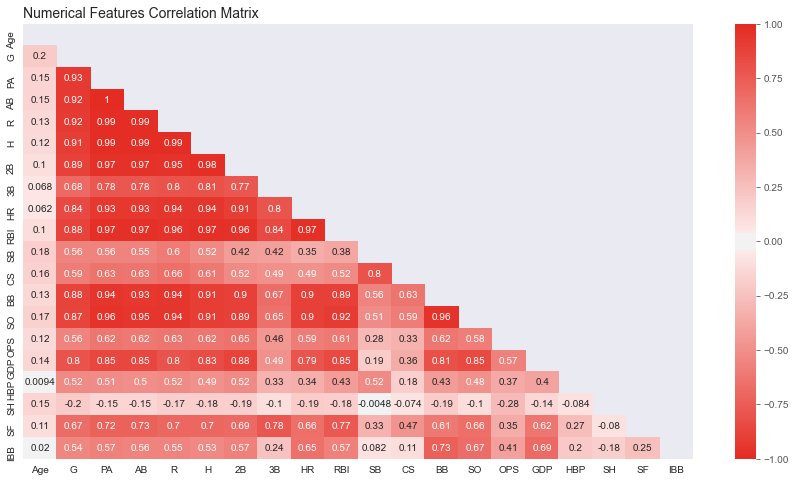

In [328]:
# Cheacking for correlation:
# Numeric variables correlation
cmap = sns.diverging_palette(13, 13, s=90, n=5, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,8))
style.use('ggplot')
corr = batting.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(corr,mask=mask, annot=True, 
            cmap=cmap, vmin = -1, vmax = 1)
plt.title("Numerical Features Correlation Matrix", loc="left", fontsize=14)